# PRAC 1: Anàlisi dels preus del lloguer

L'objectiu durant les pràctiques 1 i 2 és analitzar les diferències en els preus dels lloguers oferts en diverses webs dels Estats Units. A la pràctica 1 ens centrarem en netejar i fer el preprocessament d'un conjunt de dades extrect del UCI ML Repository.

Establirem quatre categories de preus: "Baix", "Mitjà", "Mitjà-Alt" i "Alt" i explorarem com es relacionen aquestes categories amb les especificacions dels apartaments ofertats; metres quadrats, serveis, localització, si s'accepten mascotes, etc. Després aplicarem un algorisme de reducció dimensional i finalment un algorisme de clustering sobre les variables numèriques per estudiar si els grups creats presenten alguna relació amb les categories de preu definides com a exploració inicial. La idea és preparar i entendre el conjunt de dades per tal d'aplicar algorismes de classificació supervisats amb l'objectiu d'aconseguir classificar els apartaments correctament segons les diverses categories de preus a la pràctica 2.


### Importació de paquets i obtenció del dataset

In [4]:
#Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
import folium 
from ucimlrepo import fetch_ucirepo 

In [5]:
#Fetching the dataset
import warnings
#Ignoring warning message
warnings.filterwarnings('ignore')
rent_data = fetch_ucirepo(id=555) 

### Informació rellevant sobre el conjunt de dades analitzades.

El conjunt de dades utilitzat prové del repositori de dades per a Machine Lerning de UCI. Es tracta d'un dataset elaborat el 2019 comprès de 99826 registres i 22 columnes orientat a tasques de classificació, regressió i clustering. La informació que inclou fa referència a ofertes d'apartaments de lloguer dels EUA en diversos portals web. Les variables més importants són els preus d'aquests lloguers, així com les especificacions d'aquests i informació referent a l'anunci en si, per exemple, si compta amb foto o no. A continuació es pot consultar tant la direcció web com descarregar les dades en format .csv.

In [129]:
# Metadata
for k,v in rent_data.metadata.items():
    print(f'{k}:\n{v}\n')

uci_id:
555

name:
Apartment for Rent Classified

repository_url:
https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified

data_url:
https://archive.ics.uci.edu/static/public/555/data.csv

abstract:
This is a dataset of classified for apartments for rent in USA.


area:
Business

tasks:
['Classification', 'Regression', 'Clustering']

characteristics:
['Multivariate']

num_instances:
10000

num_features:
21

feature_types:
['Categorical', 'Integer']

demographics:
[]

target_col:
None

index_col:
['id']

has_missing_values:
no

missing_values_symbol:
None

year_of_dataset_creation:
2019

last_updated:
Mon Feb 26 2024

dataset_doi:
10.24432/C5X623

creators:
[]

intro_paper:
None

additional_info:
{'summary': "The dataset contains of 10'000 or 100'000 rows and of 22 columns The data has been cleaned in the way that \r\ncolumn price and square_feet never is empty but the dataset is saved as it was created.\r\n\r\nCan be used for different machine learning tasks such as clust

### Anàlisi inicial de les dades

A continuació es presenta una mostra de les dades així com els noms de les diferents variables i el tipus de dada. Abans de començar amb el preprocessament del dataset, seleccionarem només les variables d'interès. En aquest cas, descartarem el títol i la descripció de l'anunci dels apartaments. També descartarem la variable "time", així com l'adreça i les variables "fee" i "price_display" i "category".

In [130]:
# Creating dataframe
df_rent = pd.DataFrame(rent_data.data.features)
#Displaying first 5 rows
df_rent.head()

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1,1,USD,No,Thumbnail,Cats,...,2195,Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1.577360e+09
1,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3,USD,No,Thumbnail,"Cats,Dogs",...,1250,Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1.577360e+09
2,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2,3,USD,No,Thumbnail,NaN,...,1395,Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1.577360e+09
3,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1,2,USD,No,Thumbnail,"Cats,Dogs",...,1600,Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1.577360e+09
4,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1,1,USD,No,Thumbnail,"Cats,Dogs",...,975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1.577360e+09


In [131]:
#Displaying variable information
print(df_rent.info())

#Discard uninteresting vars
df_rent = df_rent.drop(["title","body","fee","price_display","address","time", "category"], axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99826 entries, 0 to 99825
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       99826 non-null  object 
 1   title          99826 non-null  object 
 2   body           99826 non-null  object 
 3   amenities      83749 non-null  object 
 4   bathrooms      99760 non-null  object 
 5   bedrooms       99699 non-null  object 
 6   currency       99822 non-null  object 
 7   fee            99823 non-null  object 
 8   has_photo      99823 non-null  object 
 9   pets_allowed   39192 non-null  object 
 10  price          99821 non-null  float64
 11  price_display  99820 non-null  object 
 12  price_type     99823 non-null  object 
 13  square_feet    99823 non-null  object 
 14  address        7946 non-null   object 
 15  cityname       99521 non-null  object 
 16  state          99521 non-null  object 
 17  latitude       99797 non-null  float64
 18  longit

### Tractament de valors nuls

Aquesta primera anàlisi ens revela diverses coses. En primer lloc existeixen valors nuls. Veiem que les variables amb més valors d'aquest tipus són "pets allowed" i "amenities". L'elevat nombre de valors nuls en el cas de la primera variable ens pot fer sospitar que en aquest cas el NaN indica que no es permeten mascotes. Testejam la hipòtesi analitzant els diferents valors possibles de la variable.

In [132]:
#Getting categorical variable levels for pets_allowed
df_rent["pets_allowed"].unique()

array(['Cats', 'Cats,Dogs', nan, 'Dogs', 'Monthly', '823',
       'Cats,Dogs,None'], dtype=object)

En aquest cas, veiem que no existeix una opció de "Not allowed" o similars i, per tant, assumirem que el NaN representa que no es permeten mascotes. A continuació substituirem aquests valors nuls per "Not allowed" i també eliminarem els valors estranys que hem identificat com "Monthly", "823" o "Cats,Dogs,None".

In [133]:
#Transforming values and checking result
df_rent["pets_allowed"] = np.where(df_rent["pets_allowed"].isnull(), "Not allowed",
                                   np.where(df_rent["pets_allowed"].isin(["Monthly","Cats,Dogs,None","823"]), np.nan, df_rent["pets_allowed"]))
df_rent["pets_allowed"].dropna()
df_rent["pets_allowed"].unique()

array(['Cats', 'Cats,Dogs', 'Not allowed', 'Dogs', nan], dtype=object)

Podem realitzar una anàlisi similar en el cas de la variable "amenities". Tanmateix, veiem que per aquesta variable existeixen 9843 valors únics, el que resulta una mica sospitós. Si fem una inspecció més profunda podem comprovar que les "amenities" són una llista de serveis amb els quals compta l'apartament. El fet que sigui una llista amb diferents combinacions d'elements és el que fa que existeixin tants valors únics. Podriem optar per descartar aquesta variable. Tanmateix, optarem per aplicar diverses transformacions que puguin convertir-la en informació útil.

In [134]:
#Getting categorical variable levels for pets_allowed
df_rent["amenities"].nunique()

9843

En primer lloc, esbrinarem quins són els diferents tipus de serveis. En aquest cas, n'hi ha 27 i apareixen llistats a sota. En segon lloc crearem una nova columna al dataframe per cada tipus de servei. Aquestes noves variables seran del tipus categòric. És a dir, si tenen un 1 voldrà dir que l'apartament compta amb el servei en qüestió i si tenen un 0, voldrà dir que no. Finalment, crearem una darrera variable que serà el total de serveis amb els quals el propietari ha indicat que compta l'apartament.

In [135]:
#Obtain the different types of amenities available and discard the inapropriate values
uniq_amenities = list()

for i in df_rent["amenities"].str.split(","):
    if isinstance(i,list):
        for j in i:
            uniq_amenities.append(j)
    
uniq_amenities = set(uniq_amenities)
uniq_amenities.remove("No")
uniq_amenities.remove("USD")

#Print the unique values
list(map(print,uniq_amenities))
print("Total elements: ", len(uniq_amenities))

#Transform each amenity into a binary column variable
for i in uniq_amenities:
    df_rent[i] = 0

for column in uniq_amenities:
    for n, item in zip(range(df_rent.shape[0]), df_rent["amenities"].str.split(",")):
        if isinstance(item,list):
            if column in item:
                df_rent.loc[n,column] = 1

#Creating additional metric total_amenities
df_rent["total_amenities"] = df_rent[list(uniq_amenities)].sum(axis=1)
df_rent["total_amenities"] = df_rent["total_amenities"].astype(float)
#Drop original amenities column
df_rent = df_rent.drop("amenities", axis = 1)
df_rent.tail()


Elevator
Luxury
Tennis
Internet Access
Alarm
Golf
Gym
Clubhouse
Fireplace
Wood Floors
Gated
Parking
Garbage Disposal
Cable or Satellite
Washer Dryer
Refrigerator
View
TV
AC
Doorman
Basketball
Hot Tub
Patio/Deck
Playground
Dishwasher
Pool
Storage
Total elements:  27


,bathrooms,bedrooms,currency,has_photo,pets_allowed,price,price_type,square_feet,cityname,state,...,AC,Doorman,Basketball,Hot Tub,Patio/Deck,Playground,Dishwasher,Pool,Storage,total_amenities
99821,1.0,1.0,USD,Yes,Not allowed,780.0,Monthly,605,Houston,TX,...,0,0,0,0,1,1,0,0,1,6.0
99822,2.0,2.0,USD,Yes,"Cats,Dogs",813.0,Monthly,921,Jacksonville,FL,...,1,0,0,0,1,1,1,1,1,13.0
99823,1.0,1.0,USD,Yes,"Cats,Dogs",1325.0,Monthly,650,San Diego,CA,...,0,0,0,0,0,0,0,0,0,2.0
99824,1.0,1.0,USD,Yes,"Cats,Dogs",931.0,Monthly,701,Huntersville,NC,...,0,0,0,0,0,0,0,1,0,2.0
99825,1.5,2.0,USD,Yes,Not allowed,1595.0,Monthly,900,San Diego,CA,...,0,0,0,0,0,0,0,0,0,3.0


Pel que fa a la resta de valors nuls, simplement els eliminarem, ja que el conjunt de dades és suficientment gran.

In [136]:
#Drop rows with null values
df_rent = df_rent.dropna()

### Transformacions de variables

Abans s'ha mostrat la informació referent al tipus de dada de cada columna. A partir d'aquesta informació es pot comprovar que algunes de les variables no tenen el fromat pertinent, així que cal realitzar algunes transformacions. Començant pel nombre de banys i d'habitacions, assumirem que aquestes variables han de ser enters i eliminarem els registres que no compleixin aquest criteri. Una altra opció seria arrodonir els valors o substituïrlos per la mitjana però, de nou, com que comptem amb un dataset molt gran, optarem per eliminar els registres.

In [137]:
#Print dtypes
print(set(map(type,df_rent["bedrooms"])))
print(set(map(type,df_rent["bathrooms"])))

#Transform into float
df_rent["bedrooms"] = df_rent["bedrooms"].astype(float)
df_rent["bathrooms"] = df_rent["bathrooms"].astype(float)

#Filter out decimal numbers
df_rent = df_rent[df_rent["bedrooms"].apply(lambda x: x.is_integer())]
df_rent = df_rent[df_rent["bathrooms"].apply(lambda x: x.is_integer())]

{<class 'float'>, <class 'str'>}
{<class 'float'>, <class 'str'>}


Pel que fa a la variable currency eliminarem els valors que no siguin USD. A més, només considerarem els apartament amb price_type mensual. Una vegada fetes aquestes transformacions podem eliminar les columnes.

In [138]:
#Filter out values
df_rent = df_rent[df_rent["price_type"] == "Monthly"]
df_rent = df_rent[df_rent["currency"] == "USD"]
#Drop columns
df_rent = df_rent.drop(["price_type","currency"], axis = 1)

A continuació analitzem la variable has_photo, que pot ser del tipus Si, No o Thumbnail i, per tant, sembla correcte. També transformarem la variable square_feet en decimals i en metres quadrats, i els noms de les ciutats i els estats en cadenes de text. Més avall, es pot veure la informació sobre les columnes després de les transformacions aplicades.

In [139]:
#Check unique values
print(df_rent["has_photo"].unique(),"\n")

#Convert to float & square meters
df_rent["square_feet"] = df_rent["square_feet"].astype(float)
df_rent["square_m"] = df_rent["square_feet"] * 0.092903
#Convert to float
df_rent = df_rent.drop(["square_feet"],axis=1)
#Convert to str
df_rent["cityname"] = df_rent["cityname"].astype(str)
df_rent["state"] = df_rent["state"].astype(str)

# Column info
print(df_rent.info())

['Thumbnail' 'No' 'Yes'] 

<class 'pandas.core.frame.DataFrame'>
Index: 93833 entries, 0 to 99824
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bathrooms           93833 non-null  float64
 1   bedrooms            93833 non-null  float64
 2   has_photo           93833 non-null  object 
 3   pets_allowed        93833 non-null  object 
 4   price               93833 non-null  float64
 5   cityname            93833 non-null  object 
 6   state               93833 non-null  object 
 7   latitude            93833 non-null  float64
 8   longitude           93833 non-null  float64
 9   source              93833 non-null  object 
 10  Elevator            93833 non-null  int64  
 11  Luxury              93833 non-null  int64  
 12  Tennis              93833 non-null  int64  
 13  Internet Access     93833 non-null  int64  
 14  Alarm               93833 non-null  int64  
 15  Golf                93833 non-n

### Anàlisi inicial i neteja de variables numèriques

En aquesta secció es farà una anàlisi inicial de les variables numèriques. Les geogràfiques i les creades a partir dels serveis oferts als diferents apartaments seran estudiades més endavant.

En primer lloc, podem comprovar que cap de les variables conté valors negatius, el que és un bon indicador. La gran diferència entre els valors dels tercers quartils i els valors màxims fa sospitar que molt probablement existeixen outliers, és a dir, apartaments especialment luxosos en aquest cas. Algunes altres de les conclusions que podem extreure és que de mitjana els apartaments tenen 1.4 banys i 1.7 habitaccions i que la desviació típica entorn d'aquestes mitjanes no és molt elevada. La mitjana del preu son 1512 USD mensuals i la desviacio tipica 851 USD mensuals. Els metres quadrats mitjans son 87 amb desviació tipica de 31 metres. Finalment, per la mètrica total amenities, la mitjana de serveis son 3.7 i la desviacio tipica 3.3.

In [140]:
#Describing numerical
df_rent_numerical = df_rent.select_dtypes(float).drop(["latitude","longitude"], axis = 1)
df_rent_numerical.describe()

,bathrooms,bedrooms,price,total_amenities,square_m
count,93833.000000,93833.000000,93833.000000,93833.000000,93833.000000
mean,1.414556,1.691484,1511.871911,3.704518,86.685919
std,0.525332,0.726097,851.228084,3.318343,30.849158
min,1.000000,0.000000,100.000000,0.000000,9.940621
25%,1.000000,1.000000,1012.000000,1.000000,66.890160
50%,1.000000,2.000000,1349.000000,3.000000,82.497864
75%,2.000000,2.000000,1780.000000,5.000000,102.193300
max,9.000000,9.000000,52500.000000,18.000000,1114.836000


Procedim a eliminar els outliers. Seleccionarem només aquells valors que estiguin entre els llindars ± 1.5 IQR. En general veiem que les desviacions estandard s'han reduit de manera important i que les mitjanes han baixat, el que indica que els apartaments outliers en general eren probablement els més luxosos.

In [141]:
#Calc IQR and filter out outliers
q1 = df_rent_numerical.quantile(0.25)
q3 = df_rent_numerical.quantile(0.75)
iqr = q3 - q1

for column in df_rent_numerical.columns:
    df_rent_numerical = df_rent_numerical[df_rent_numerical[column].between(q1.loc[column] - 1.5 * iqr.loc[column], q3.loc[column] + 1.5 * iqr.loc[column])]

# Modify original df
for column in df_rent_numerical.columns:
    df_rent = df_rent[df_rent[column].between(q1.loc[column] - 1.5 * iqr.loc[column], q3.loc[column] + 1.5 * iqr.loc[column])]
    
#Show new data
df_rent_numerical.describe()

,bathrooms,bedrooms,price,total_amenities,square_m
count,84337.000000,84337.000000,84337.000000,84337.000000,84337.000000
mean,1.375577,1.632463,1387.337788,3.378351,83.175306
std,0.490019,0.653134,518.465673,2.783891,23.189064
min,1.000000,0.000000,100.000000,0.000000,13.935450
25%,1.000000,1.000000,995.000000,1.000000,66.332742
50%,1.000000,2.000000,1305.000000,3.000000,80.268192
75%,2.000000,2.000000,1690.000000,5.000000,100.242337
max,3.000000,3.000000,2932.000000,11.000000,155.148010


Passem, ara, a analitzar les noves variables creades a partir de les amenities. Gràcies a les transformacions aplicades, calcular el percentatge d'apartaments amb cada tipus de servei respecte al total resulta molt senzill. A partir del gràfic inferior veiem que els serveis més comuns son la piscina i el parquing. Més d'un 40% dels lloguers compten amb aquests. En tercer lloc trobem el gimnàs que esta una mica per sota del 40%. Els menys comuns son els apartaments amb vistes, alarma, porter, luxe i golf.

<Axes: title={'center': "Percentatge d'apartaments amb els serveis llistats"}>

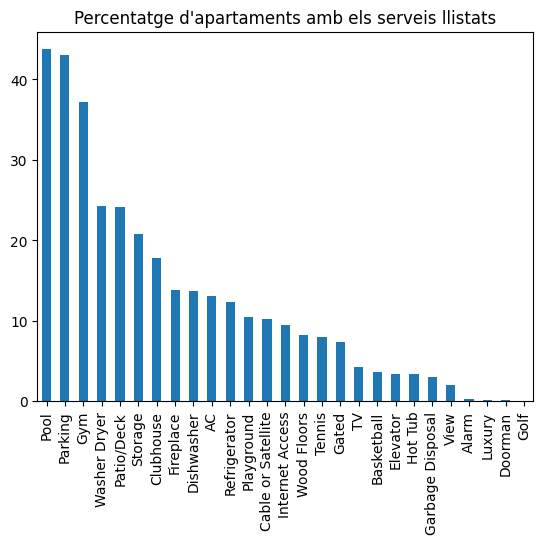

In [142]:
#Analizing amenities
amenities = df_rent[list(uniq_amenities)].mean(axis=0).sort_values(ascending=False)*100
amenities.plot.bar(title="Percentatge d'apartaments amb els serveis llistats")

Com a pas final, discretitzarem la variable preu per 1) poder avaluar més fàcilment si les classes creades mitjançant el clustering estan lligades als diferents nivells de preus i 2) poder-la fer servir el futures pràctiques per a tasques de classificació, si s'escau.

In [143]:
#Price binning
df_rent["price_bins"] = pd.cut(df_rent["price"], 4, labels = ["low","mid","mid-high","high"])
df_rent["price_bins"].value_counts()

price_bins
mid         45626
mid-high    22040
low          9607
high         7064
Name: count, dtype: int64

### Anàlisi de variables categòriques

En aquest punt ens centrarem en fer una anàlisi exploratoria de les variables categòriques, exceptuant les ciutats a les quals pertanyen els apartaments ofertats degut al seu elevat nombre.

En primer lloc veiem que la majoria d'ofertes compten amb foto (>50%), aproximadament un 35% compten amb thumbnail i menys d'un 10% no inclouen cap tipus d'imatge. Pel que fa a la política de mascotes, més d'un 60% dels apartaments no permeten animals. Més d'un 35% permeten gossos i gats i menys d'un 5% fan distinció entre gats i gossos, permetent els primers però no els segons. Si analitzem el percentatge d'apartaments que correspon a cada estat veiem que Texas i Califòrnia encapçalen el conjunt, el que no és sorprenent ja que són els estats més poblats i no hem normalitzat el recompte en funció de la població. Virgina i Colorado ocupen el tercer i quart lloc respectivament. Finalment, veiem que la majoria d'apartaments (>95%) venen d'una sola pàgina web. Aquesta informació ens indica que probablement és una bona idea reduir els nivells d'aquesta variable. En aquest cas hem optat per mantenir-ne tres: "RentDigs.com","RentLingo" i "Others". És a dir, hem mantingut les dues pàgines més populars i hem agrupat la resta en una categoria genèrica.

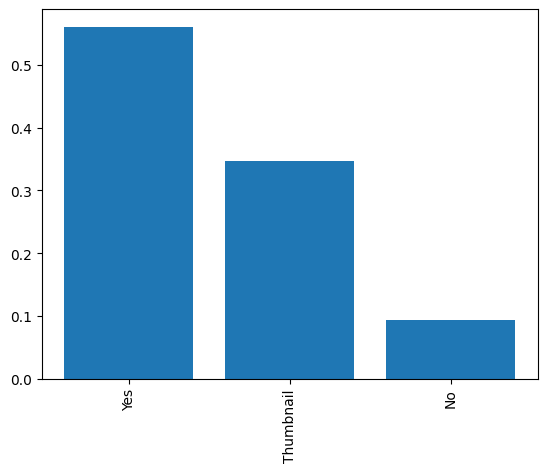

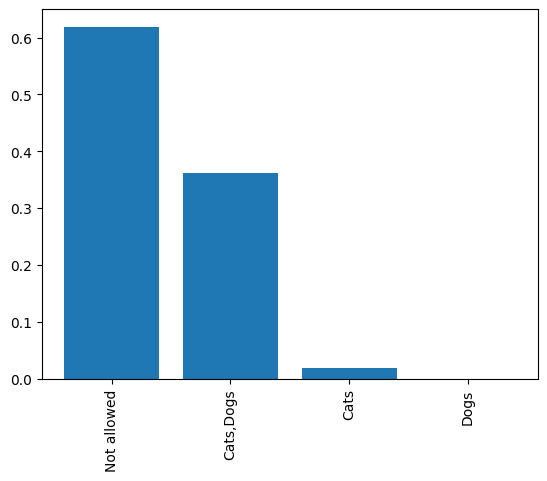

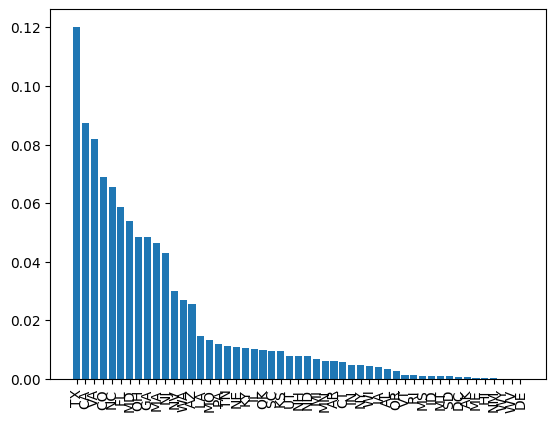

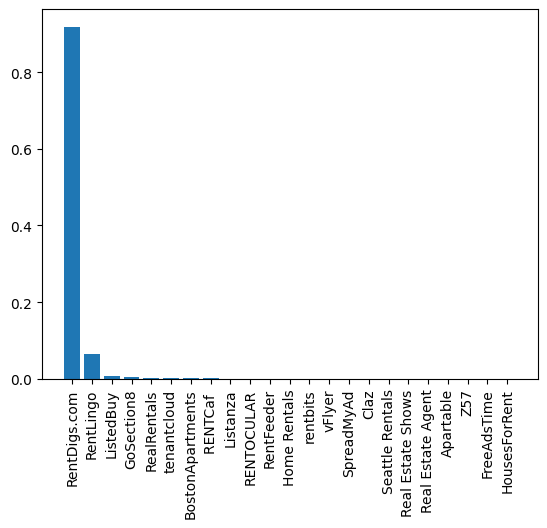

In [144]:
#Display percentage graphs
for i in df_rent.select_dtypes(object).columns:
    if (i != "cityname"):
        df = df_rent[i].value_counts().reset_index()
        plt.bar(height=df["count"]/df["count"].sum(),x=df[i])
        plt.xticks(rotation = 90)
        plt.show()

In [145]:
#Transform source variable reduce classes
df_rent["source"] = np.where((df_rent["source"] != "RentDigs.com") & (df_rent["source"] != "RentLingo"),
                             "Others",
                             df_rent["source"])
#Value counts
df_rent["source"].value_counts()

source
RentDigs.com    77521
RentLingo        5459
Others           1357
Name: count, dtype: int64

També podem analitzar aquestes classes en relació a la nostra variable d'interès que és el preu. En aquest cas ho farem a través de boxplots. Veiem que les diferències en el cas de tenir foto a l'anunci no semblen significatives. Pel que fa a la política de mascotes, les diferències tampoc són molt grans però sembla que els preus son més elevats en el cas dels apartaments que permeten gossos o que no permeten mascotes. Finalment, sembla que la pàgina RentDIgs.com, en general conté ofertes mab preus més elevats.

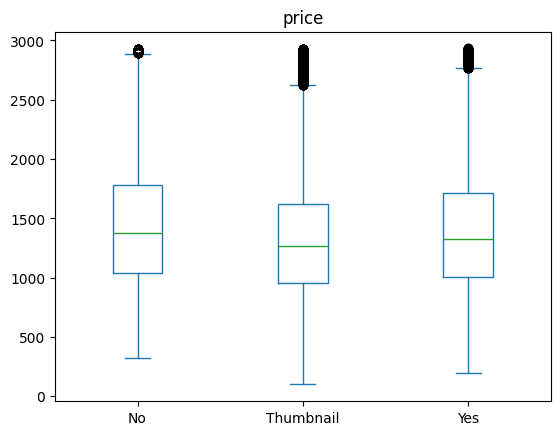

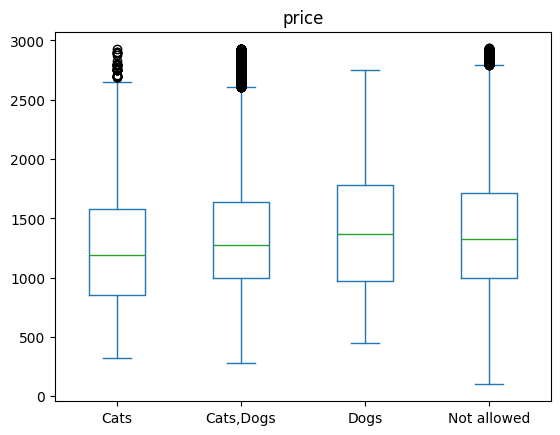

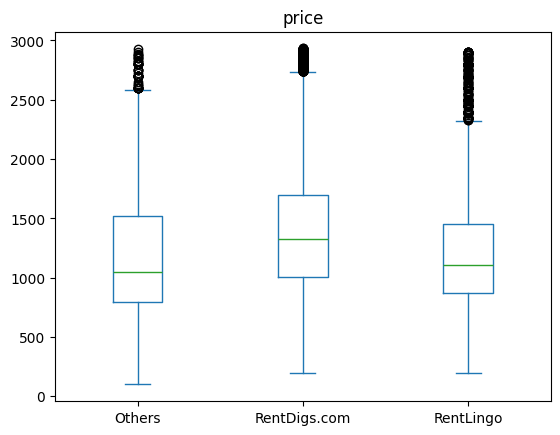

In [146]:
#Display percentage graphs
for i in df_rent.select_dtypes(object).columns:
   if (i != "cityname") & (i != "state"):
      df_rent.plot.box(column = "price", by=i)
      #sns.violinplot(data = df_rent, x = "price", y = i)
      plt.show()

### Anàlisi de variables geogràfiques

En aquesta secció farem una anàlisi per entendre millor la informació geogràfica inclosa en el conjunt de dades.

En primer lloc s'ha elaborat un mapa interactiu on es pot observar la localització de cada un dels apartaments. Això ens permet veure que s'inclouen alguns allotjaments remots en llocs com Alaska o Hawaii però que la majoria es concentren en les grans ciutats de la costa est i oest dels EUA. També trobem una gran densitat d'ofertes a Florida i a la zona dels grans llacs. Més cap a l'interior, veiem aglomeracions en les grans ciutats com Atlanta, Dallas, Denver o Kansas.

Nota: Per veure el mapa activi el codi esborrant "#". S'ha desactivat per evitar augmentar excessivament el pes del fitxer.

In [147]:
#Extract coordinates data
coords = list(zip(df_rent["latitude"].to_list(),df_rent["longitude"].to_list()))
#Create folium map
rent_map = folium.Map(location = [sum([x[0] for x in coords])/len(coords),
                               sum([x[1] for x in coords])/len(coords)],
                               zoom_start = 3)
for coord in coords:
    folium.CircleMarker(location=coord, radius=1, color='green', fill=True, fill_color='green').add_to(rent_map)

#Display Map
#rent_map

També podem estudiar la localització dels apartaments en relació al preu. Per fer-ho farem servir un hexplot, que ens permetrà considerar agrupacions d'apartaments i assignar-los un color en base al preu mitjà. Això ens permetrà identificar zones on els preus son més elevats i d'altres en qe són més baixos.

Si s'observa el gràfic inferior, es pot veure que algunes de les zones amb els preus més elevats inclouen San Francisco, Los Angeles, Nova York, Boston, Florida o Hawaii. En general els preus més elevats els trobem a les zones costeres i a les grans ciutats. A l'interior, la zona de Denver també és de les més cares.

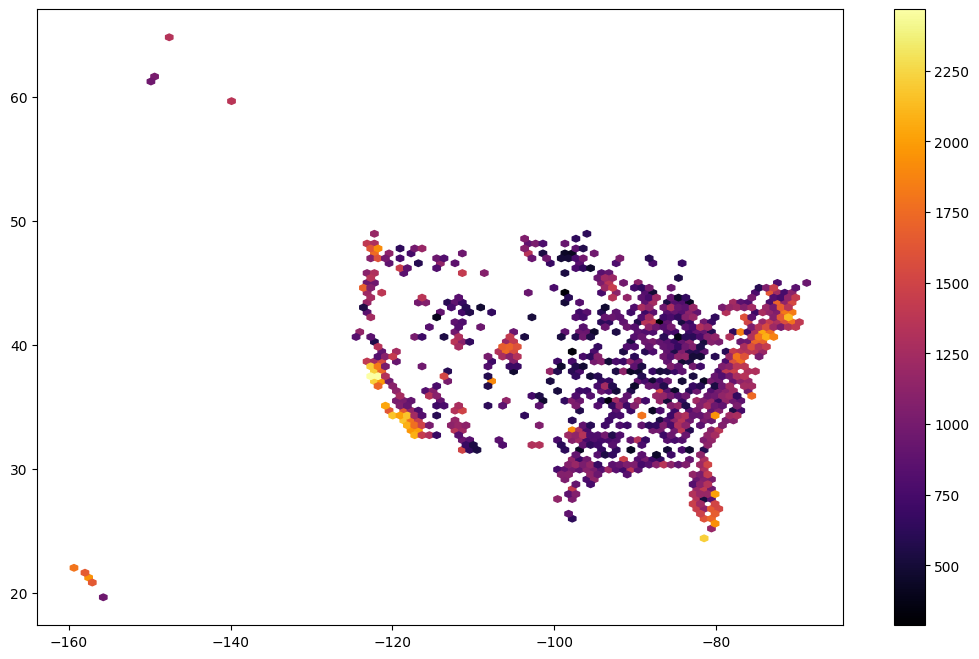

In [148]:
#Display Hexbin
plt.figure(figsize=(13,8))
plt.hexbin(df_rent["longitude"], df_rent["latitude"], gridsize=100, cmap='inferno', mincnt=1, C=df_rent["price"])
plt.colorbar()
plt.show()

Com a darrer pas en l'exploració de les variables geogràfiques podem agrupar els diversos punts per proximitat i delimitar gran zones geogràfiques que no tinguin en compte les fronteres estatals. És possible que en la segona part de la pràctica aquestes noves categories ens puguin resultar d'utilitat per a la classificació dels apartaments.

En aquest cas, no fa falta normalitzar les variables malgrat fer servir l'algorisme K-means. Això no tendria sentit, ja que la longitud i la latitud perdrien el seu sentit geogràfic si els aplicam una normalització.

S'ha optat per crear diferenciar entre 7 grans zones intentant aproximar aquelles delimitades pels diferents rangs de preus, ja que existeix una correlació significativa entre els preus i la localització geogràfica.

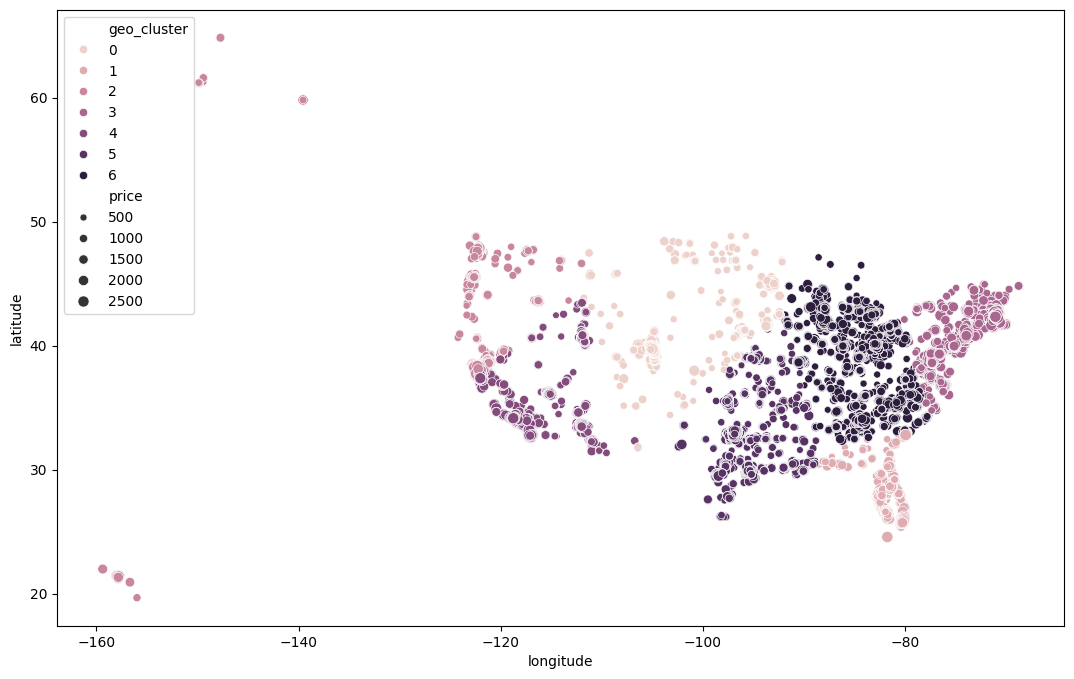

In [149]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 7, random_state = 222)
kmeans.fit(df_rent[["latitude","longitude"]])
cluster_labels = kmeans.predict(df_rent[["latitude","longitude"]]).tolist()

#Add cluster labels to original df
df_rent["geo_cluster"] = cluster_labels
plt.figure(figsize=(13,8))
sns.scatterplot(x=df_rent["longitude"], y=df_rent["latitude"],size=df_rent["price"], hue=df_rent["geo_cluster"])
plt.show()

### Reducció de la dimensionalitat

Ara que hem fet una primera revisió de les variables del nostre conjunt de dades, podem aplicar algunes tècniques estadístiques que ens facilitaran la modelització de la informació.

En primer lloc intentarem reduïr el nombre de noves variables binàries que s'han creat a partir de les amenities. Per fer-ho aplicarem l'algorisme SVD i reduirem les 27 columnes original a només 5 que, en aquest cas, expliquen un 53% de la variabilitat en les dades originals. S'ha optat per l'SVD en lloc del PCA, ja que el subconjunt de dades que volem reduir és una matriu sparse on la majoria dels valors son 0. En aquest cas, l'algorisme SVD resulta molt més eficient ja que no resta la mitjana de les columnes a les dades.

A sota podem veure la variança explicada per cada component. El primer explica pràcticament un 20% de la variança total, el segon un 12%, el tercer un 7% i el darrer un 6%. El total és un 53% de la variança de les dades originals.

In [150]:
#Apply SVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5, n_iter=10, random_state=222)
svd.fit(df_rent[list(uniq_amenities)])
#Explained variance by component
print(svd.explained_variance_ratio_,"\n")
#Total explained variance
print(svd.explained_variance_ratio_.sum())

[0.18701882 0.1176832  0.10033865 0.06693249 0.05660596] 

0.5285791129760341


In [151]:
#Add the new variables to the original df and drop amenities
reduced_data = svd.transform(df_rent[list(uniq_amenities)])

for i in range(reduced_data.shape[1]):
    data_toadd = reduced_data[:,i].tolist()
    df_rent[f"Component_{i+1}"] = data_toadd

#Drop amenities columns 
df_rent = df_rent.drop(list(uniq_amenities), axis = 1)

#Show resulting df_rent
df_rent.head()

,bathrooms,bedrooms,has_photo,pets_allowed,price,cityname,state,latitude,longitude,source,total_amenities,square_m,price_bins,geo_cluster,Component_1,Component_2,Component_3,Component_4,Component_5
0,1.0,1.0,Thumbnail,Cats,2195.0,Redondo Beach,CA,33.8520,-118.3759,RentLingo,0.0,50.353426,mid-high,4,0.0,0.0,0.0,0.0,0.0
2,2.0,3.0,Thumbnail,Not allowed,1395.0,Raleigh,NC,35.8230,-78.6438,RentLingo,0.0,153.289950,mid,6,0.0,0.0,0.0,0.0,0.0
3,1.0,2.0,Thumbnail,"Cats,Dogs",1600.0,Vacaville,CA,38.3622,-121.9712,RentLingo,0.0,76.180460,mid-high,2,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,Thumbnail,"Cats,Dogs",975.0,Albuquerque,NM,35.1038,-106.6110,RentLingo,0.0,57.971472,mid,0,0.0,0.0,0.0,0.0,0.0
6,2.0,2.0,Thumbnail,Not allowed,1600.0,Hampton,VA,37.0451,-76.3664,RentLingo,0.0,104.051360,mid-high,3,0.0,0.0,0.0,0.0,0.0


Procedim a analitzar la importància de les diverses amenities en els 5 components als quals hem reduit el conjunt de variables d'amenities. Recordem que els components estan ordenats segons el percentatge de variabilitat de les dades originals que expliquen, essent el primer el que compta amb el percentatge major.

A sota es pot comprovar que els serveis que tenen el major impacte en el primer component són la piscina, el gimnàs i el pàrquing. És a dir que els apartaments amb puntuacions elevades per aquesta mètrica segurament comptaran amb aquests serveis. Pel segon component el que pren més importància és el pàrquing, igual que en el cas del tercer, encara que per aquest component son els electrodomèstics els que ocupen el segon i tercer lloc. En el cas del component 4 i 5, els serveis de més importància són l'eixugadora i la porxada respectivament.

In [152]:
singular_values = svd.singular_values_
components = svd.components_
feature_importance_in_components = np.abs(components) * singular_values[:, np.newaxis]

for n, component in enumerate(components):
    print(f"Component {n+1}:")
    feature_ranking = np.argsort(feature_importance_in_components[n])[::-1]
    for rank, feature in enumerate(feature_ranking):
        if rank <= 2:
            print(f"\tRank {rank+1}; Feature: {list(uniq_amenities)[feature]}; Importance: {feature_importance_in_components[n, feature].round(2)}")
#


Component 1:
	Rank 1; Feature: Pool; Importance: 160.7
	Rank 2; Feature: Gym; Importance: 142.77
	Rank 3; Feature: Parking; Importance: 132.54
Component 2:
	Rank 1; Feature: Parking; Importance: 111.46
	Rank 2; Feature: Gym; Importance: 64.86
	Rank 3; Feature: Pool; Importance: 59.39
Component 3:
	Rank 1; Feature: Parking; Importance: 70.41
	Rank 2; Feature: Dishwasher; Importance: 61.6
	Rank 3; Feature: Refrigerator; Importance: 54.57
Component 4:
	Rank 1; Feature: Washer Dryer; Importance: 61.82
	Rank 2; Feature: Storage; Importance: 53.2
	Rank 3; Feature: Pool; Importance: 43.97
Component 5:
	Rank 1; Feature: Patio/Deck; Importance: 72.97
	Rank 2; Feature: Washer Dryer; Importance: 53.02
	Rank 3; Feature: Pool; Importance: 33.68


### Clustering

Com a pas final d'aquesta pràctica, agruparem les observacion mitjançant l'algorisme de clustering k-means. En aquest cas farem servir les noves variables creades a partir del SVD, així com la resta de variables numèriques exceptuant el preu i la longitud i la latitud. Els motius son els següents.
1. Evitarem incloure el preu per després avaluar si els clusters creats presenten alguna relació amb les categories de preus "Baix", "Mitjà", "Mitjà-Alt" i "Alt".
2. Evitarem incloure les variables geogràfiques perquè aquestes no es poden normalitzar, ja que perdrien el seu sentit.

In [153]:
cluster_vars = df_rent.select_dtypes(float).drop(["latitude","longitude","price"], axis = 1)
cluster_vars

,bathrooms,bedrooms,total_amenities,square_m,Component_1,Component_2,Component_3,Component_4,Component_5
0,1.0,1.0,0.0,50.353426,0.000000,0.000000,0.000000,0.000000,0.000000
2,2.0,3.0,0.0,153.289950,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.0,2.0,0.0,76.180460,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.0,1.0,0.0,57.971472,0.000000,0.000000,0.000000,0.000000,0.000000
6,2.0,2.0,0.0,104.051360,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
99818,1.0,2.0,4.0,46.916015,0.663784,0.658646,0.995393,0.289304,-0.120934
99820,1.0,1.0,4.0,60.386950,1.481575,-0.739588,0.164071,-0.427285,-0.246768
99821,1.0,1.0,6.0,56.206315,1.527365,0.585535,-0.343316,-0.612365,-0.501305
99823,1.0,1.0,2.0,60.386950,0.166684,0.220075,0.467795,0.364515,-0.000528


Com a primer pas transformarem els valors perque totes les variables estiguin a escala. En segon lloc generarem 4 clusters i veurem si més o menys es corresponen amb les 4 categories de preus definides. Si observem la informació inferior veiem que els 4 clusters no s'acaben de correspondre a les 4 categories de preus. Els clusters 0, 2 i 3 pertanyen a la categoria de preu mitjà i el cluster 1 s'acosta més a la mitjana de preu del grup "Mitjà-Alt".

In [154]:
#Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Scale values
scaler = StandardScaler()
cluster_vars_scaled = scaler.fit_transform(cluster_vars)

#Apply Kmeans 4 clusters
kmeans = KMeans(n_clusters = 4, random_state = 222)
kmeans.fit(cluster_vars_scaled)
cluster_labels = kmeans.predict(cluster_vars_scaled).tolist()

#Add cluster labels to original df
df_rent["cluster"] = cluster_labels

#Check cluster price means against
print(df_rent[["cluster","price"]].groupby("cluster").mean().sort_values(by="price"),
      "\n",
      df_rent[["price_bins","price"]].groupby("price_bins").mean())

               price
cluster             
2        1260.725027
0        1279.472604
3        1316.005126
1        1574.076004 
                   price
price_bins             
low          682.784740
mid         1163.655832
mid-high    1798.219964
high        2508.304785


Després d'aquesta primera comprovació intentarem trobar el número òptim de clusters per classificar els apartaments. Per fer-ho utilitzarem un Elbow plot i iterarem el Kmeans per obtenir els resultats per diferents nombres de clusters. Segons el gràfic el número òptim de clusters serien 7.

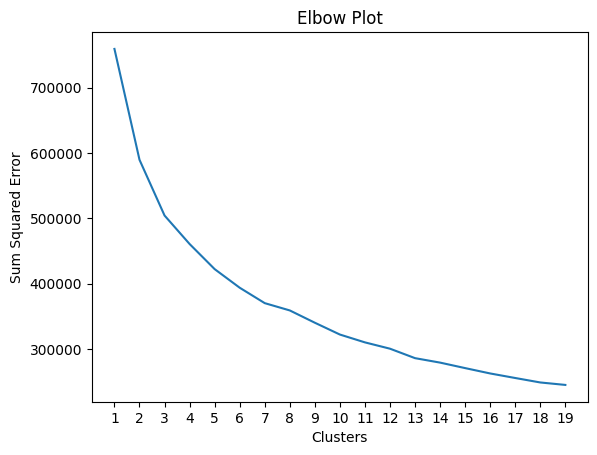

In [155]:
#Elbow plot
sum_sq_err = []
for clusters in range(1, 20):
    kmeans = KMeans(n_clusters = clusters, random_state = 222)
    kmeans.fit(cluster_vars_scaled)
    sum_sq_err.append(kmeans.inertia_)

plt.plot(range(1, 20), sum_sq_err)
plt.xticks(range(1, 20))
plt.title("Elbow Plot")
plt.xlabel("Clusters")
plt.ylabel("Sum Squared Error")
plt.show()

Encara que el clustering no hagi resultat efectiu per identificar clarament els apartaments més cars, segueix essent una eina útil per entrentre les diferents tipologies d'immobles ofertades. Com a pas final d'aquesta activitat exploratòria podem estudiar les diferències que existeixen entre els diferents clusters creats per les mitjanes de diverses variables.

Més avall es pot comprovar com els apartaments dels clusters 4, 5 i 6 es caracteritzen per tenir més banys i habitacions, més metres quadrats i preus més elevats. Això sembla bastant coherent ja que com més espai disponible més banys i habitacions es poden construir i, en general, més car serà el preu. També veiem que el total de serveis varia considerablement entre clusters i sembla que guarda poca relació tant amb el preu com amb les dimensions dels immobles.

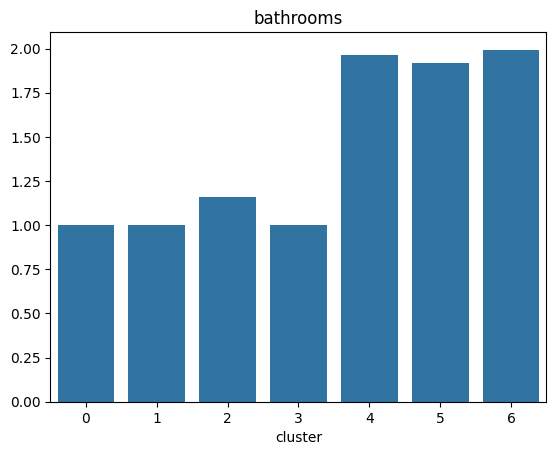

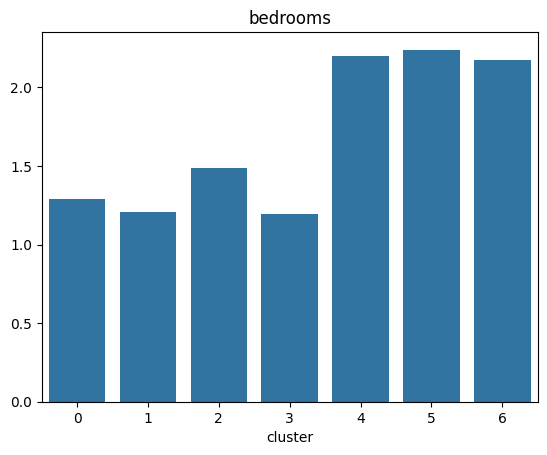

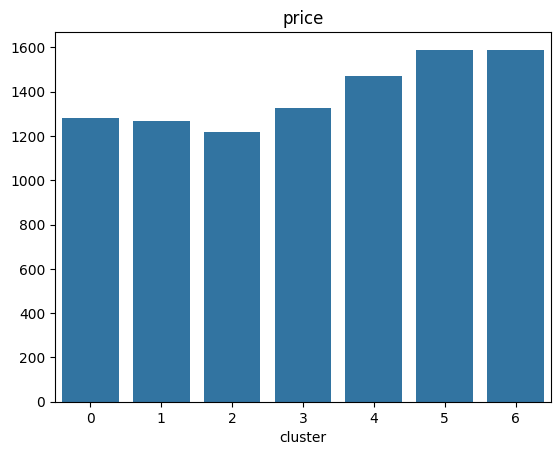

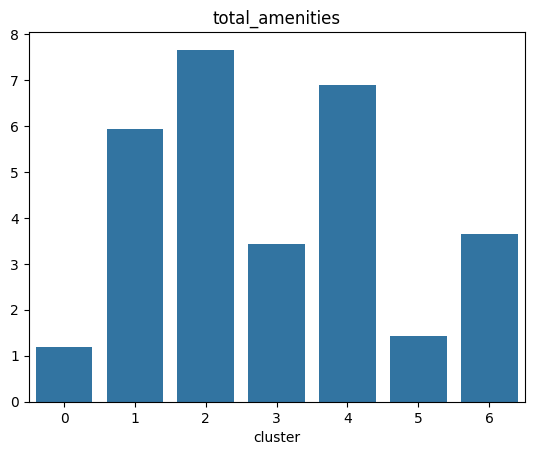

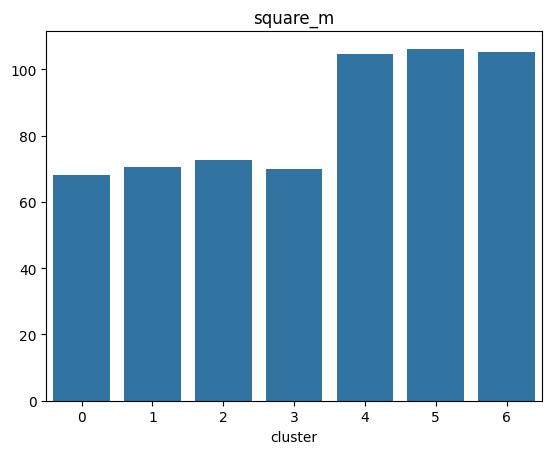

In [156]:
#Apply Kmeans 7 clusters
kmeans = KMeans(n_clusters = 7, random_state = 222)
kmeans.fit(cluster_vars_scaled)
cluster_labels = kmeans.predict(cluster_vars_scaled).tolist()

#Add cluster labels to original df
df_rent["cluster"] = cluster_labels

clust_means = df_rent.select_dtypes([int,float]).drop(["latitude","longitude","geo_cluster","Component_1","Component_2","Component_3","Component_4","Component_5"], axis = 1).groupby("cluster").mean()

for i in clust_means:
    sns.barplot(clust_means.loc[::,i])
    plt.ylabel("")
    plt.title(i)
    plt.show()

### Conslusió

En aquesta pràctica s'ha fet una primera anàlisi exploratòria del datset i s'han realitzat tasques de preprocessament de dades, és a dir, neteja, reducció dimensional i una primera investigació sobre les diverses variables. Hem conclòs que la localització geogràfica juga un paper important en el preu dels apartaments i hem creat noves variables tant categòriques com numèriques que podrem aprofitar en la segona part de la pràctica.